In [ ]:
import pandas as pd
import numpy as np
import re
import string
from tensorflow.keras.layers import Bidirectional, Embedding, Dense, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import one_hot

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df['sentiment'].value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

In [ ]:
df['sentiment'] = df['sentiment'].map({'positive':1, 'negative':0})

In [ ]:
def clean_text(text):
  text = text.lower()
  text = re.sub(r'^\d+','', text)
  translator = str.maketrans("","",string.punctuation)
  text = text.translate(translator)
  text = ' '.join(text.split())
  stop_words = set(stopwords.words('english'))
  word_tokens = nltk.word_tokenize(text)
  text = [token for token in word_tokens if token not in stop_words]
  text = ' '.join(text)
  return text

In [ ]:
raw_text = df['review'].apply(lambda x: clean_text(x))

In [ ]:
vocab_size= 8000
input_sequence = [one_hot(word, vocab_size) for word in raw_text]

In [ ]:
input_sequence[0:10]

[[3442,
  6476,
  6116,
  7715,
  64,
  6683,
  7552,
  1265,
  5561,
  6987,
  261,
  1465,
  2201,
  1384,
  1269,
  1365,
  4816,
  6683,
  819,
  4150,
  668,
  1397,
  1990,
  6987,
  5501,
  4060,
  6831,
  4866,
  714,
  7562,
  4501,
  4866,
  4040,
  1083,
  3053,
  2989,
  7557,
  1397,
  5449,
  3690,
  3422,
  675,
  1384,
  6800,
  6683,
  6138,
  5715,
  3302,
  3285,
  1719,
  6556,
  1328,
  3105,
  1374,
  3390,
  7089,
  1879,
  863,
  2821,
  4221,
  4932,
  875,
  6274,
  605,
  3605,
  456,
  6332,
  5119,
  7089,
  6057,
  7026,
  447,
  3272,
  5441,
  3102,
  6149,
  3060,
  7616,
  4857,
  6787,
  5922,
  1950,
  7142,
  5268,
  1467,
  2846,
  446,
  5715,
  1384,
  2529,
  4248,
  4142,
  5983,
  4866,
  1065,
  1367,
  5744,
  2302,
  7677,
  7529,
  4348,
  1765,
  1512,
  7045,
  469,
  7350,
  4348,
  2297,
  4348,
  3314,
  6846,
  5920,
  7937,
  1269,
  7552,
  1978,
  2701,
  4816,
  6171,
  2163,
  7960,
  4248,
  2660,
  6290,
  5002,
  494,
  6683,

In [ ]:
import statistics
max_seq_len = max([len(x) for x in input_sequence])
mean_seq_len = statistics.mean([len(x) for x in input_sequence])

In [ ]:
print(max_seq_len)
print(mean_seq_len)

1449
122.82322


In [ ]:
# 75th percentile for input_sequence
np.percentile(np.array([len(x) for x in input_sequence]), 75)

149.0

In [ ]:
sent_len = 149
emd_docs = pad_sequences(input_sequence, padding='pre', maxlen=sent_len)
print(emd_docs.shape)

(50000, 149)


In [ ]:
emd_docs[0:5]

array([[1990, 6987, 5501, 4060, 6831, 4866,  714, 7562, 4501, 4866, 4040,
        1083, 3053, 2989, 7557, 1397, 5449, 3690, 3422,  675, 1384, 6800,
        6683, 6138, 5715, 3302, 3285, 1719, 6556, 1328, 3105, 1374, 3390,
        7089, 1879,  863, 2821, 4221, 4932,  875, 6274,  605, 3605,  456,
        6332, 5119, 7089, 6057, 7026,  447, 3272, 5441, 3102, 6149, 3060,
        7616, 4857, 6787, 5922, 1950, 7142, 5268, 1467, 2846,  446, 5715,
        1384, 2529, 4248, 4142, 5983, 4866, 1065, 1367, 5744, 2302, 7677,
        7529, 4348, 1765, 1512, 7045,  469, 7350, 4348, 2297, 4348, 3314,
        6846, 5920, 7937, 1269, 7552, 1978, 2701, 4816, 6171, 2163, 7960,
        4248, 2660, 6290, 5002,  494, 6683,  747, 2358,  456, 2991, 5622,
        1397, 1397,  504, 1207, 4111, 1226, 1639, 4018, 4261, 1226, 6360,
        7316, 6737, 2318,  726, 1997, 6685, 4357, 4261, 5849, 2821, 5189,
        1065, 1327,  499, 3805, 2821, 3466, 7715, 6683,  981, 3252, 5664,
        2248, 7443, 6737, 1970, 6322, 

In [ ]:
data = emd_docs
target = df['sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.3, random_state=0)

In [ ]:
embedding_vector_features = 50
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_features, input_length=sent_len))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 149, 50)           400000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 200)              120800    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
Total params: 521,001
Trainable params: 521,001
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=64, verbose=2)

Epoch 1/10
547/547 - 173s - loss: 0.3986 - accuracy: 0.8175 - val_loss: 0.3121 - val_accuracy: 0.8672 - 173s/epoch - 316ms/step
Epoch 2/10
547/547 - 170s - loss: 0.2625 - accuracy: 0.8944 - val_loss: 0.3340 - val_accuracy: 0.8641 - 170s/epoch - 311ms/step
Epoch 3/10
547/547 - 170s - loss: 0.2022 - accuracy: 0.9207 - val_loss: 0.3557 - val_accuracy: 0.8567 - 170s/epoch - 311ms/step
Epoch 4/10
547/547 - 171s - loss: 0.1601 - accuracy: 0.9397 - val_loss: 0.3885 - val_accuracy: 0.8501 - 171s/epoch - 312ms/step
Epoch 5/10
547/547 - 170s - loss: 0.1274 - accuracy: 0.9539 - val_loss: 0.4604 - val_accuracy: 0.8509 - 170s/epoch - 311ms/step
Epoch 6/10
547/547 - 170s - loss: 0.1052 - accuracy: 0.9623 - val_loss: 0.5214 - val_accuracy: 0.8457 - 170s/epoch - 310ms/step
Epoch 7/10
547/547 - 170s - loss: 0.0974 - accuracy: 0.9662 - val_loss: 0.5809 - val_accuracy: 0.8466 - 170s/epoch - 311ms/step
Epoch 8/10
547/547 - 171s - loss: 0.0706 - accuracy: 0.9762 - val_loss: 0.6546 - val_accuracy: 0.8445 - 

<Figure size 432x288 with 0 Axes>

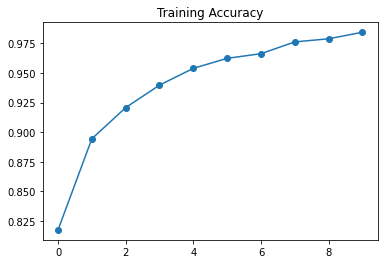

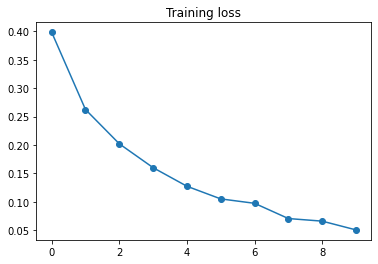

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, label='Training Accuracy', marker='o')
plt.title('Training Accuracy')
plt.figure()

plt.plot(epochs, loss, label='Training loss', marker='o')
plt.title('Training loss')
plt.figure()